# Exploratory Data Analysis

PROBLEM STATEMENT:Perform EDA on the given dataset to predict possibility of 'survival' based on the feature vectors given in the dataset

In [1]:
import mysql.connector

In [4]:
mydb = mysql.connector.connect(
  host="localhost",               #hostname
  user="root",                   # the user who has privilege to the db
  passwd="Sameer@786",               #password for user
  database="company",               #database name
)

In [25]:
query = "select * from employees;"

In [26]:
a = pd.read_sql(query,mydb)
a

C:\Users\Admin\AppData\Local\Temp\ipykernel_7792\1944403643.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  a = pd.read_sql(query,mydb)


,EmployeeID,EmployeeName,Department,Salary,BirthDate,HireDate,ManagerID
0,1,John Doe,IT,65000.0,1990-05-15,2015-02-20,NaN
1,2,Jane Smith,HR,55000.0,1985-08-22,2018-01-10,1.0
2,3,Bob Johnson,Finance,70000.0,1988-12-10,2019-06-15,2.0
3,4,Alice White,IT,60000.0,1995-04-02,2020-03-01,1.0
4,5,Charlie Brown,Finance,80000.0,1980-11-30,2010-07-05,3.0


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_sql(query,mydb )

C:\Users\Admin\AppData\Local\Temp\ipykernel_11232\3294423293.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query,mydb )


In [6]:
#pd.set_option('display.max_rows', None)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,0.02,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,0.02,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,0.02,S


In [7]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.00,0.02,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""""""",female,0,1,2,W./C. 6607,23.45,0.02,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.75,0.02,Q


In [8]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
df.shape

(891, 12)

In [10]:
columns_list = list(df.columns)


for i in columns_list:
    print('Number of unique values in column',i, 'is', df[i].nunique())


Number of unique values in column Passenger is 891
Number of unique values in column Survived is 2
Number of unique values in column Pclass is 3
Number of unique values in column Name is 891
Number of unique values in column Gender is 2
Number of unique values in column Age is 88
Number of unique values in column SibSp is 7
Number of unique values in column Parch is 7
Number of unique values in column Ticket is 681
Number of unique values in column Fare is 248
Number of unique values in column Cabin is 147
Number of unique values in column Embarked is 3


By the initial glance, we can understand that Passenger,Name will not play any role as it is just a unique number possibly given to each person. Hence, we can drop them.

In [11]:
df_cleaned= df.drop(['Passenger','Name'] ,axis=1)
#df_cleaned

In [12]:
df_cleaned.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [13]:
df_cleaned.describe(include=object)

,Gender,Ticket,Fare,Cabin,Embarked
count,891,891,891,204,889
unique,2,681,248,147,3
top,male,347082,8.05,B96 B98,S
freq,577,7,43,4,644


In [14]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Gender    891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    object 
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 69.7+ KB


Inference:

# DATA PRE-PROCESSING

# 1. Data Cleaning

In [15]:
#Checking for n values in each column
df_cleaned.isnull()

,Survived,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False
5,False,False,False,True,False,False,False,False,True,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,True,False
8,False,False,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,False,False,True,False


In [16]:
df_cleaned.isnull().sum()

Survived      0
Pclass        0
Gender        0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

INFERENCE:
    There are null values in 'Age','Cabin'and'Embarked'.we can treat them by dropping or imputation.

Method 1: Dropping rows or columns.

In [65]:
df_v1= df_cleaned.drop(['Cabin'] ,axis=1)


In [66]:
df_v1

,Survived,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.00,1,0,A/5 21171,7.25,S
1,1,1,female,38.00,1,0,PC 17599,71.2833,C
2,1,3,female,26.00,0,0,STON/O2. 3101282,7.925,S
3,1,1,female,35.00,1,0,113803,53.1,S
4,0,3,male,35.00,0,0,373450,8.05,S
5,0,3,male,NaN,0,0,330877,8.4583,Q
6,0,1,male,54.00,0,0,17463,51.8625,S
7,0,3,male,2.00,3,1,349909,21.075,S
8,1,3,female,27.00,0,2,347742,11.1333,S
9,1,2,female,14.00,1,0,237736,30.0708,C


In the cabin data set, we have 77% null values so it is not easy to handle the cabin feature that’s why I am drooping Cabin column from my data set.

Method2:Imputation

In [67]:
df_v1['Age'] = df_v1['Age'].fillna(df_v1['Age'].mean())
df_v1


,Survived,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.000000,1,0,A/5 21171,7.25,S
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.925,S
3,1,1,female,35.000000,1,0,113803,53.1,S
4,0,3,male,35.000000,0,0,373450,8.05,S
5,0,3,male,29.699118,0,0,330877,8.4583,Q
6,0,1,male,54.000000,0,0,17463,51.8625,S
7,0,3,male,2.000000,3,1,349909,21.075,S
8,1,3,female,27.000000,0,2,347742,11.1333,S
9,1,2,female,14.000000,1,0,237736,30.0708,C


But There are two null values in 'Embarked'column.we can treat them by dropping the rows.

In [21]:
df_drop = df_v1.dropna()
df_drop

,Survived,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.000000,1,0,A/5 21171,7.25,S
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.925,S
3,1,1,female,35.000000,1,0,113803,53.1,S
4,0,3,male,35.000000,0,0,373450,8.05,S
5,0,3,male,29.699118,0,0,330877,8.4583,Q
6,0,1,male,54.000000,0,0,17463,51.8625,S
7,0,3,male,2.000000,3,1,349909,21.075,S
8,1,3,female,27.000000,0,2,347742,11.1333,S
9,1,2,female,14.000000,1,0,237736,30.0708,C


In [22]:
df_drop.isnull().sum()

Survived    0
Pclass      0
Gender      0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

From the above output,We can  observe the are no null values

In [23]:
df_drop.shape

(889, 9)

In [24]:
#df_drop.duplicated().sum()
df_drop.duplicated().sum()

15

There Duplicated values in Data set

In [25]:
df_drop[df_drop.duplicated()==True]

,Survived,Pclass,Gender,Age,SibSp,Parch,Ticket,Fare,Embarked
201,0,3,male,29.699118,8,2,CA. 2343,69.55,S
324,0,3,male,29.699118,8,2,CA. 2343,69.55,S
409,0,3,female,29.699118,3,1,4133,25.4667,S
413,0,2,male,29.699118,0,0,239853,0,S
466,0,2,male,29.699118,0,0,239853,0,S
485,0,3,female,29.699118,3,1,4133,25.4667,S
612,1,3,female,29.699118,1,0,367230,15.5,Q
641,1,1,female,24.000000,0,0,PC 17477,69.3,C
644,1,3,female,0.750000,2,1,2666,19.2583,C
692,1,3,male,29.699118,0,0,1601,56.4958,S


In [36]:
newdf = df_drop.drop_duplicates()

print(newdf)

     Survived  Pclass  Gender        Age  SibSp  Parch              Ticket  \
0           0       3    male  22.000000      1      0           A/5 21171   
1           1       1  female  38.000000      1      0            PC 17599   
2           1       3  female  26.000000      0      0    STON/O2. 3101282   
3           1       1  female  35.000000      1      0              113803   
4           0       3    male  35.000000      0      0              373450   
5           0       3    male  29.699118      0      0              330877   
6           0       1    male  54.000000      0      0               17463   
7           0       3    male   2.000000      3      1              349909   
8           1       3  female  27.000000      0      2              347742   
9           1       2  female  14.000000      1      0              237736   
10          1       3  female   4.000000      1      1             PP 9549   
11          1       1  female  58.000000      0      0          

In [39]:
newdf.shape

(874, 9)

We can oberserve from above output duplicates are removed.

OUTLIERS

The numerical features available in the dataset are 'Survived','Pclass','Age','SibSp','Parch'. However, the features 'Survived', 'Pclass' ,'SibSp','Parch'are necessarily encoded categorical features.

In [41]:
newdf.columns

Index(['Survived', 'Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Age'>

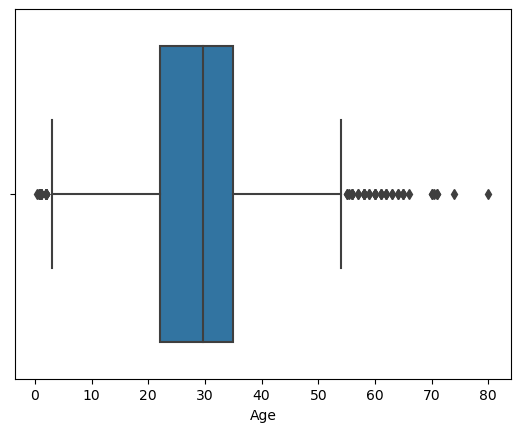

In [43]:
sns.boxplot(data=newdf, x='Age')

There are outliers in Age column

In [44]:
newdf['Survived'].value_counts()

0    540
1    334
Name: Survived, dtype: int64

 From the above result,334 out of 891 passengers in the traning data are survived.i.e.the number of people who survived is less than the number of people who are died.Now let's see what percentage of passengers survived using a pie plot.

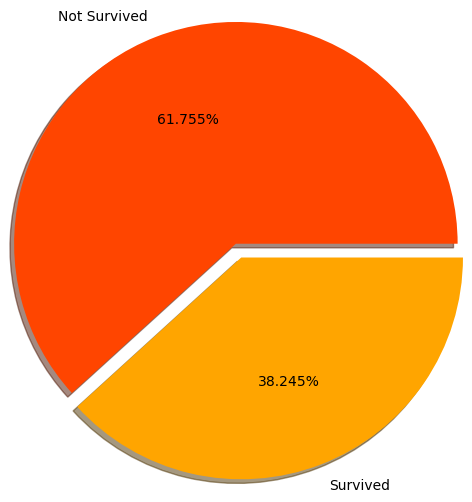

<Figure size 640x480 with 0 Axes>

In [45]:
df_grp = pd.DataFrame(newdf.groupby('Survived')['Survived'].count())
df_grp
colors = ['orangered','orange']
labels=['Not Survived', 'Survived']
plt.pie([549,340], labels=labels,autopct='%.3f%%', radius=1.5, colors=colors, shadow=True, explode=[0,0.1])
plt.show()
fig = plt.gcf()
fig.set_facecolor('black')

From the above  chart,38% of the passengers are survived based on this data.clearly,there is an imbalance in the dataset.

In [46]:
newdf.columns

Index(['Survived', 'Pclass', 'Gender', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [47]:
columns_list = list(newdf.columns)

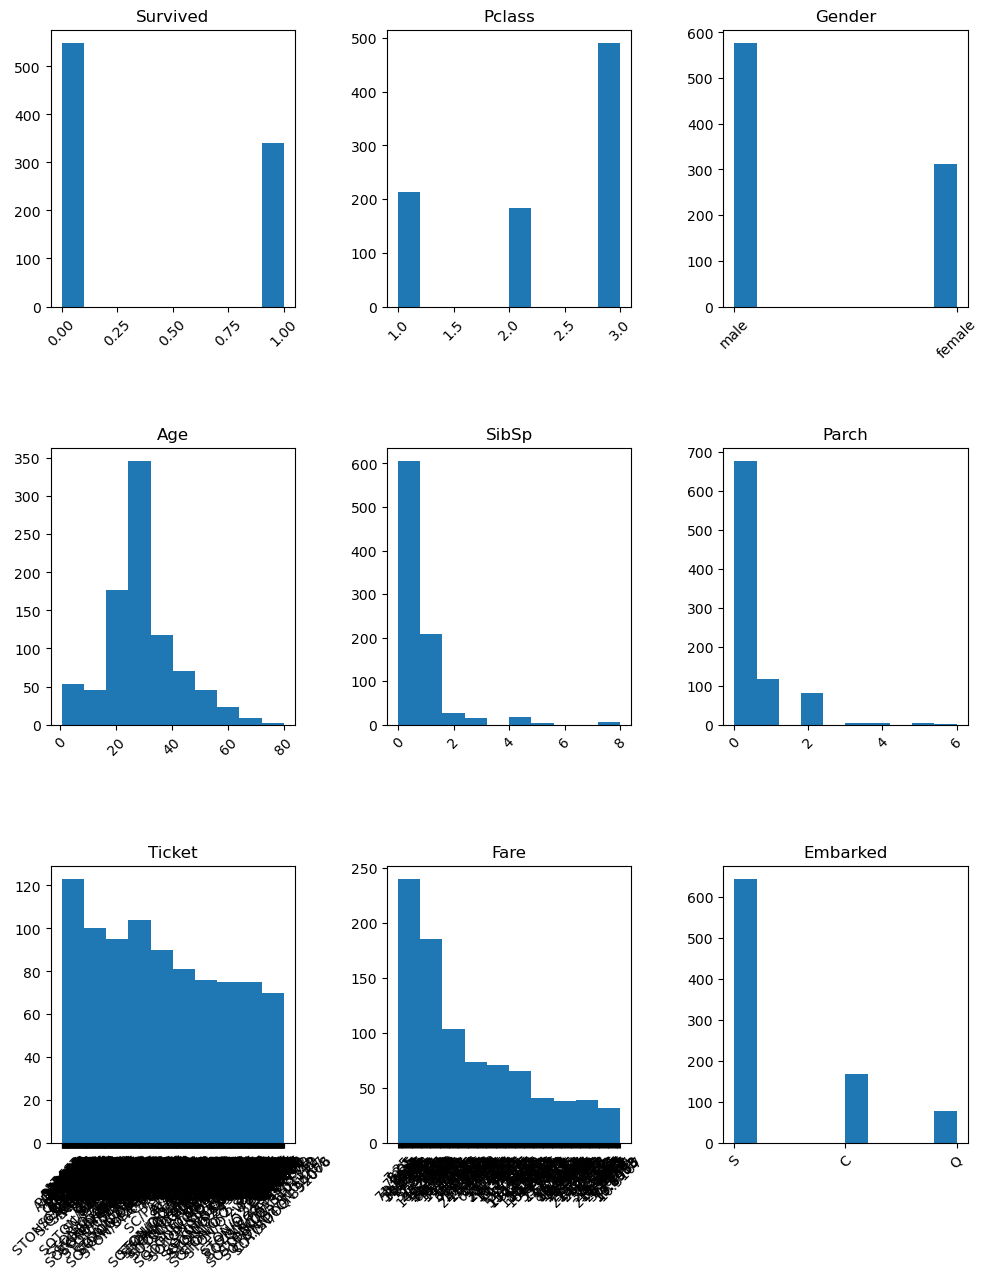

In [35]:
plt.figure(figsize=(10,20))
for i in range(len(columns_list)):
    plt.subplot(5,3,i+1)
    plt.title(columns_list[i])
    plt.xticks(rotation=45)
    plt.hist(df_drop[columns_list[i]])
    
plt.tight_layout()


1. Univariate Analysis

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

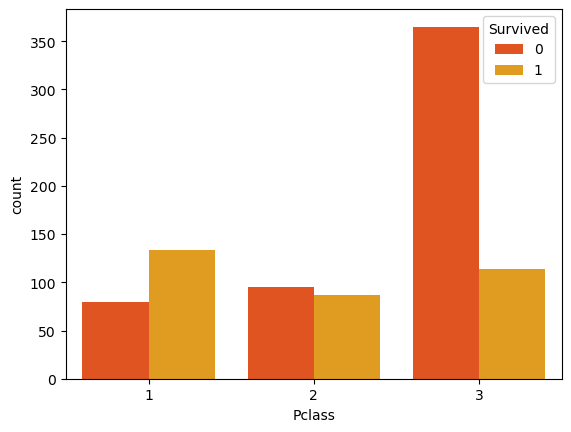

In [55]:
sns.countplot(newdf["Pclass"],hue = newdf["Survived"],palette=['orangered','orange'],data = newdf)

Inference:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

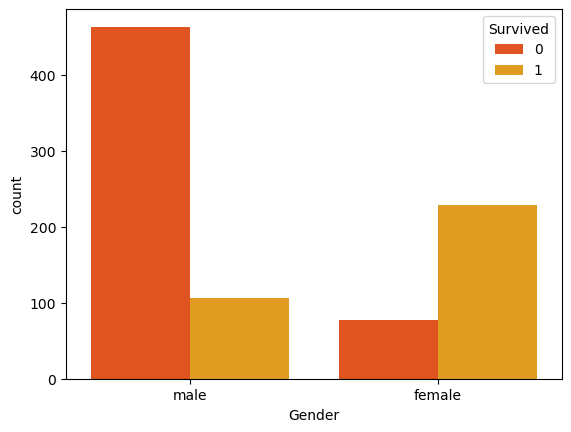

In [69]:
sns.countplot(newdf["Gender"],hue = newdf["Survived"],palette=['orangered','orange'],data = newdf)

Inference:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

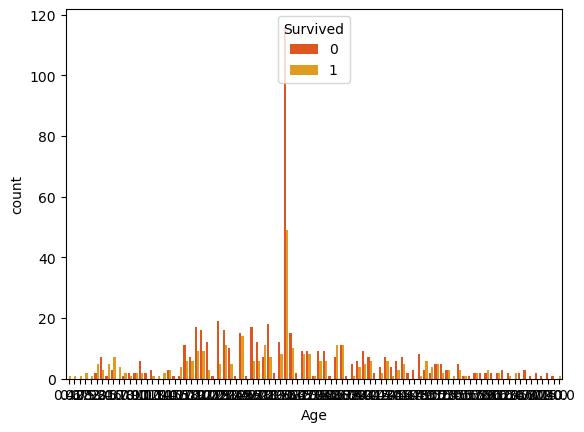

In [70]:
sns.countplot(newdf["Age"],hue = newdf["Survived"],palette=['orangered','orange'],data = newdf)

Age is a numerical feature so we can’t plot a count plot for Age feature. we need to plot pdf for Age Feature.


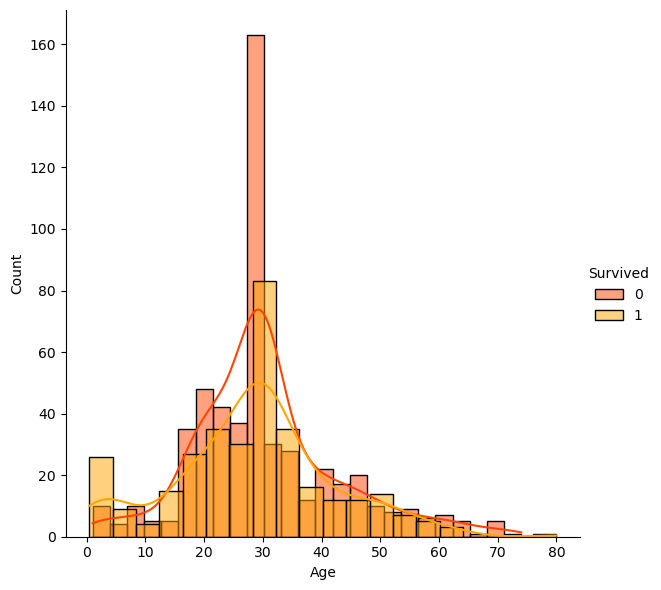

In [71]:
a = sns.FacetGrid(newdf,palette=['orangered','orange'], hue='Survived',height=6)\
    .map(sns.histplot, 'Age', kde=True)\
    .add_legend();
plt.show()

Inference:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp', ylabel='count'>

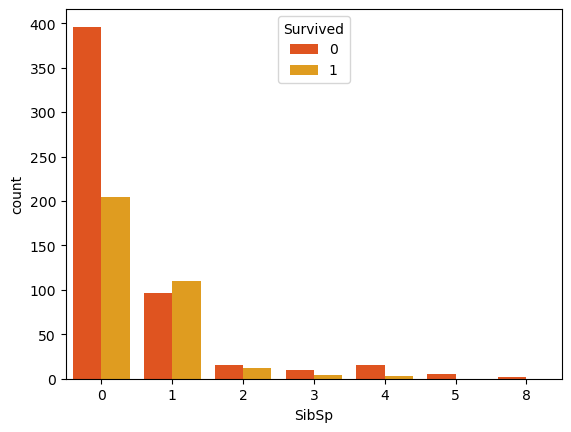

In [60]:
sns.countplot(newdf["SibSp"],hue = newdf["Survived"],palette=['orangered','orange'],data = newdf)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch', ylabel='count'>

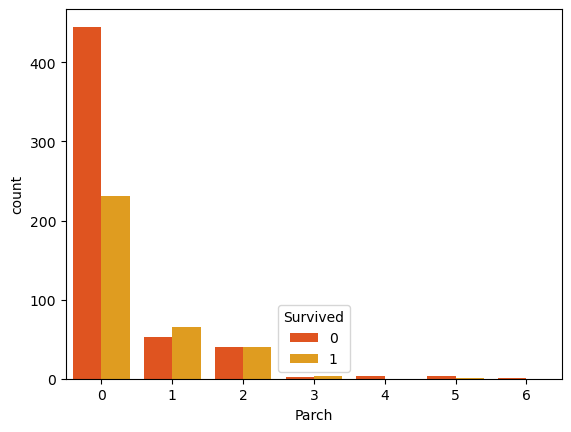

In [40]:
sns.countplot(df_drop["Parch"],hue = df_drop["Survived"],palette=['orangered','orange'],data = df_drop)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


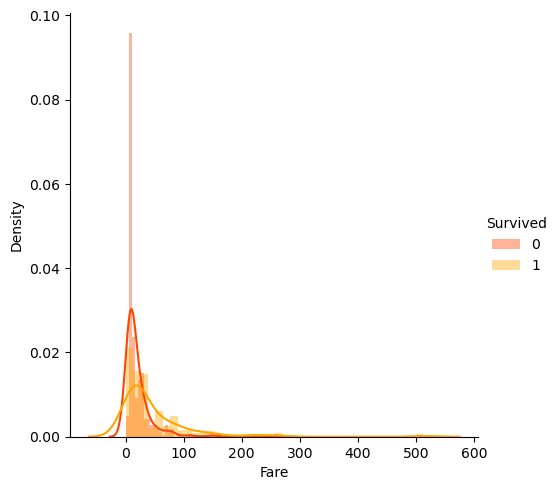

In [61]:
sns.FacetGrid(newdf,palette=['orangered','orange'], hue="Survived", size=5) \
 .map(sns.distplot, "Fare") \
 .add_legend();
plt.show();

Passengers who paid low fare have a higher chance to die. On the other hand, passengers who paid high fair have a higher chance to survive. This observation is the same as pclass persons.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

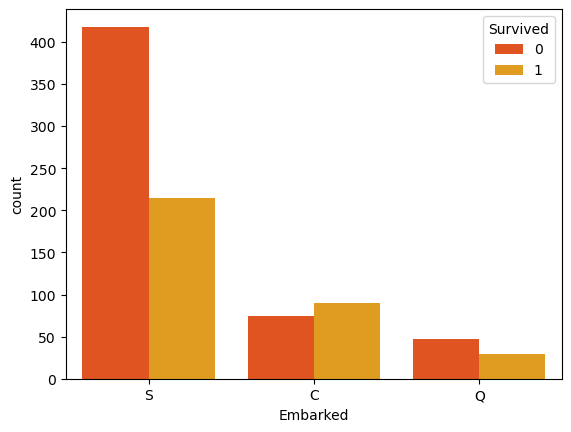

In [62]:
sns.countplot(newdf["Embarked"],hue = newdf["Survived"],palette=['orangered','orange'],data = newdf)

Bi-variate Analysis-
Pair plots are the most widely used plots to perform visualization bi-variate analysis.

<Figure size 5000x7500 with 0 Axes>

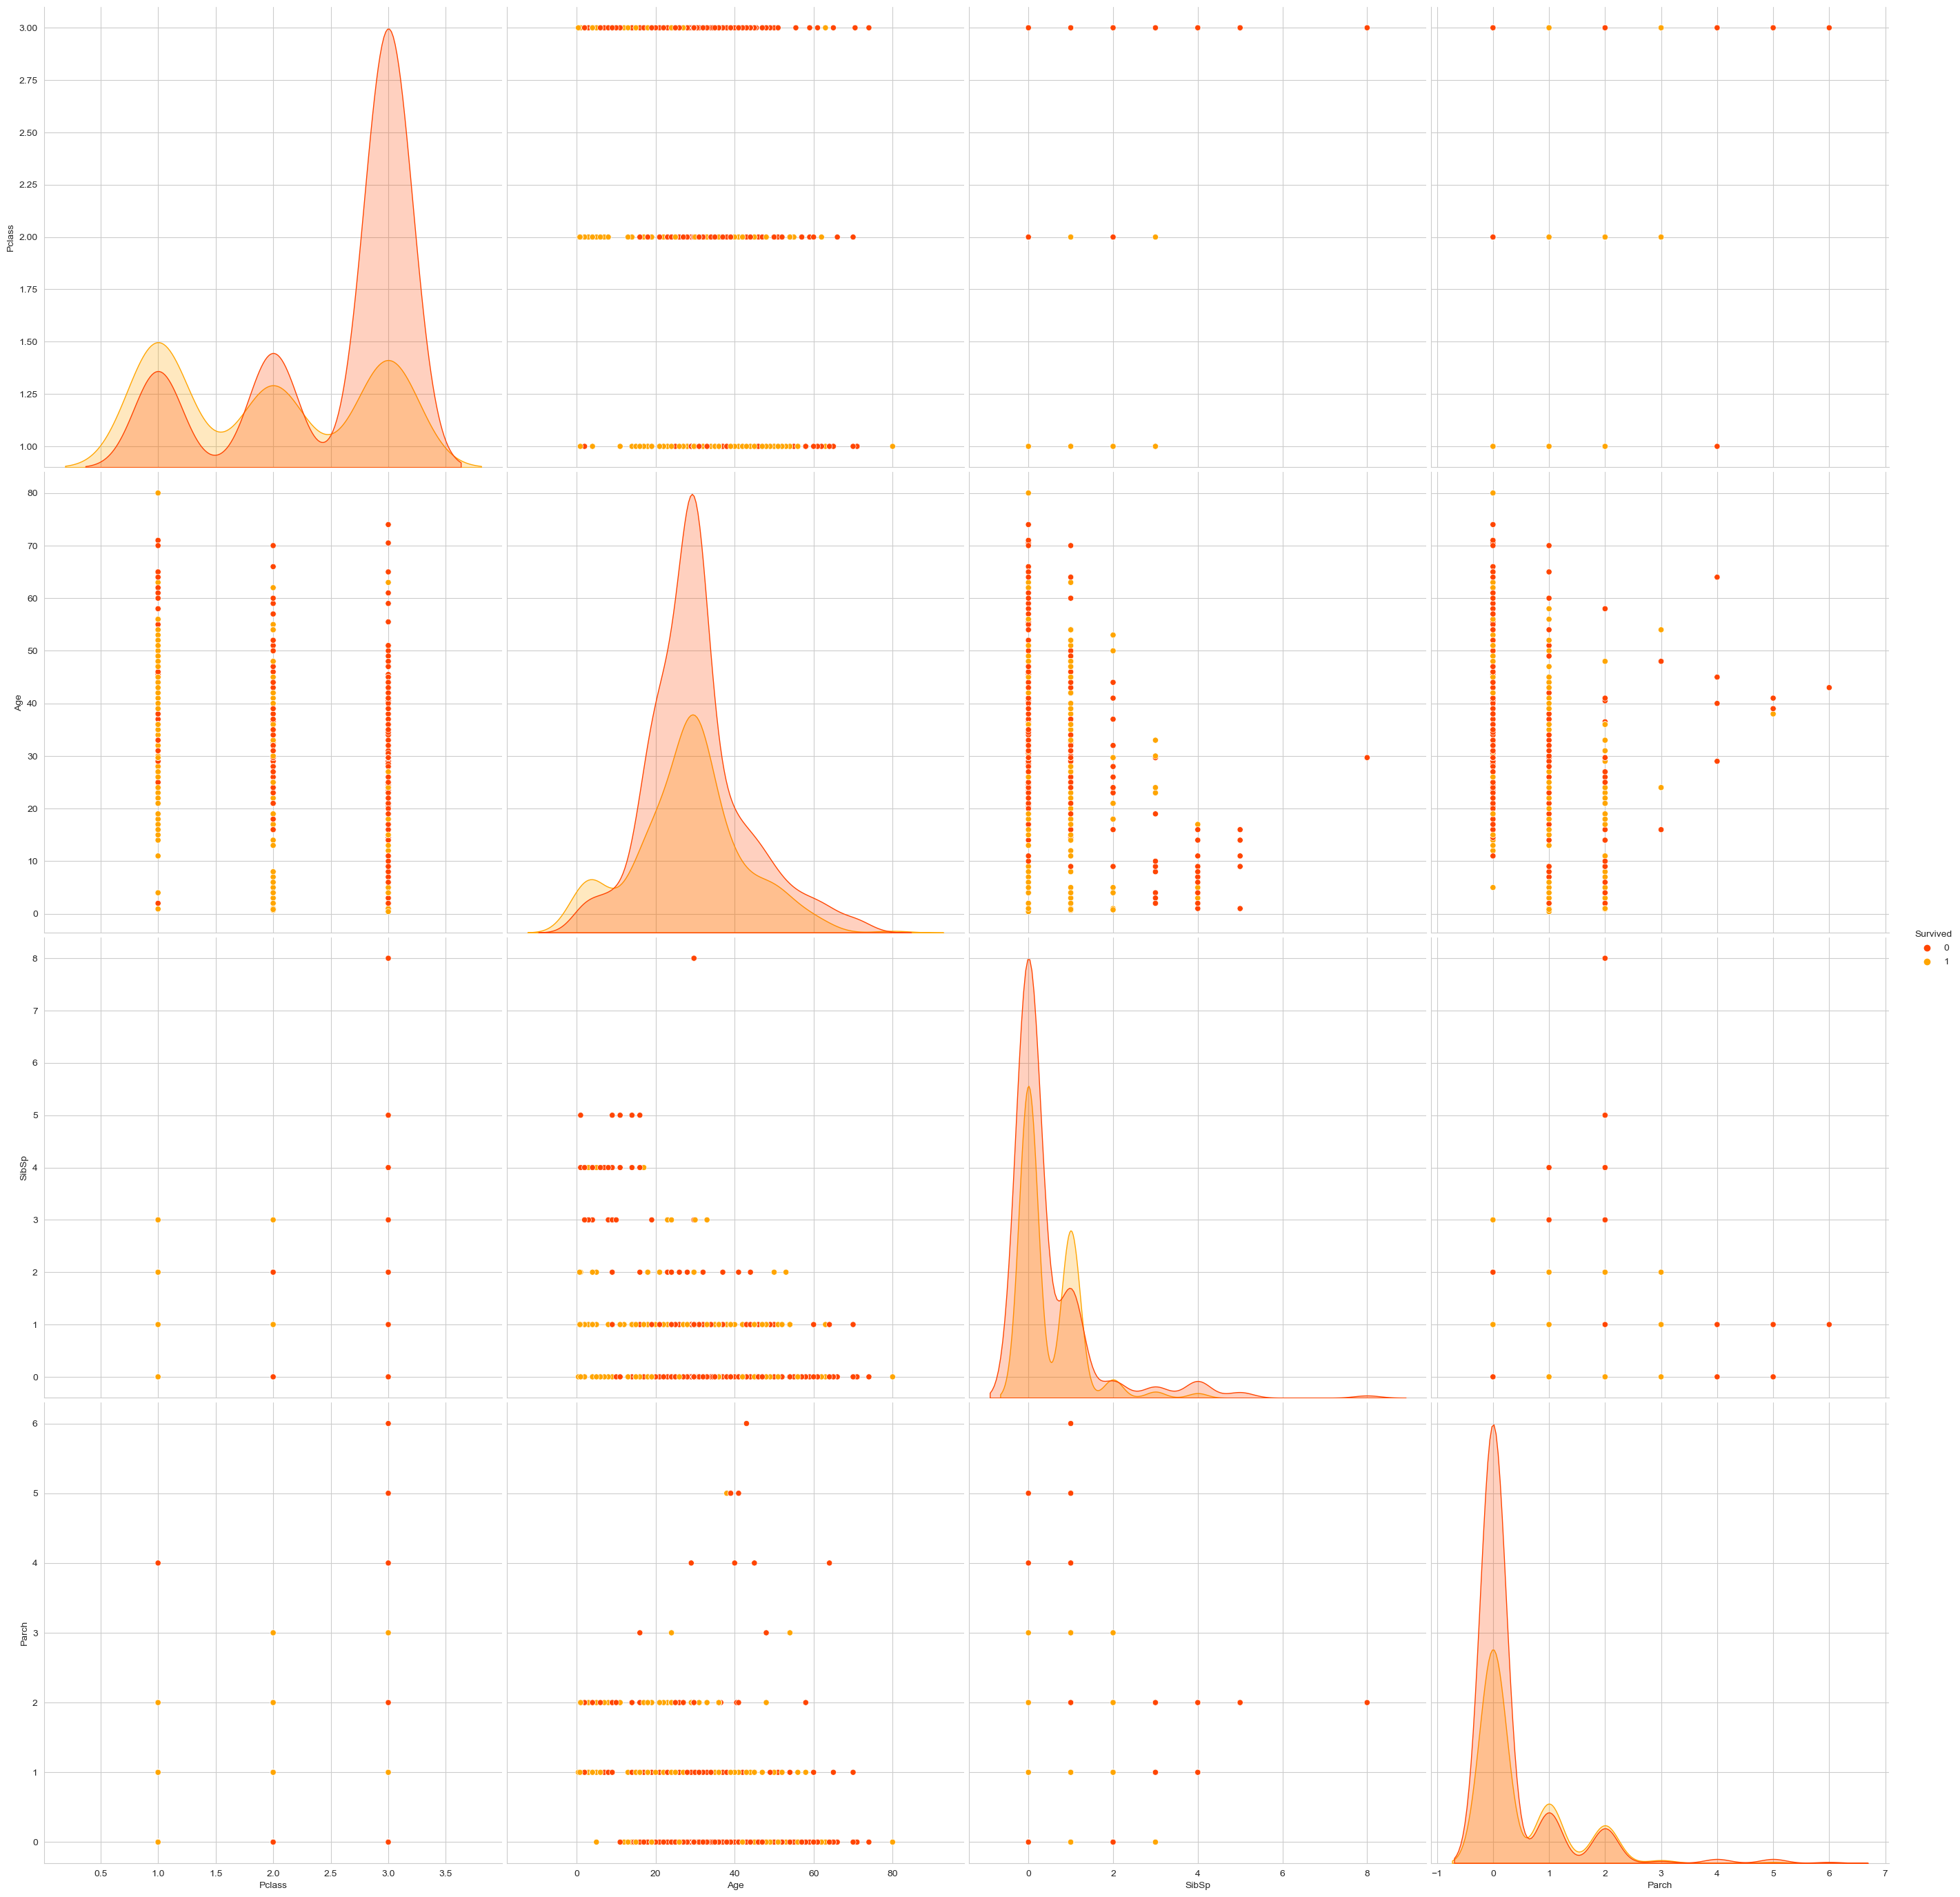

In [76]:
plt.figure(figsize=(50,75))
sns.pairplot(newdf, hue='Survived', height=7,palette=['orangered','orange'])
plt.show()